# Stochastic Oscillator Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta


In [2]:
ticker="MSFT"
start_date="2020-01-01"
end_date="2025-05-14"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(data.tail())

,Close,High,Low,Open,Volume
Date,,,,,
2025-05-07,433.350006,438.119995,431.109985,433.839996,23295300
2025-05-08,438.170013,443.670013,435.660004,437.929993,23491300
2025-05-09,438.730011,440.739990,435.880005,440.000000,15324200
2025-05-12,449.260010,449.369995,439.779999,445.940002,22821900
2025-05-13,449.140015,450.670013,445.359985,447.779999,23600600


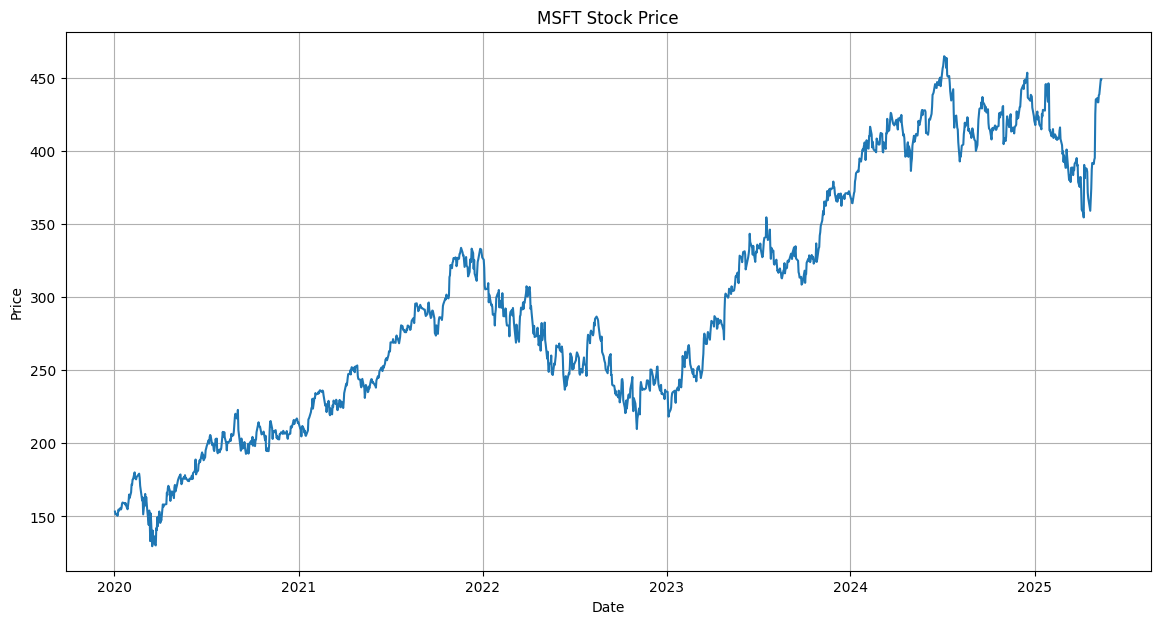

In [4]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Stochastic Oscillator:

- ความหมาย: Stochastic Oscillator คือเครื่องมือวัดโมเมนตัม (Momentum Indicator) ที่ใช้ในการวิเคราะห์ทางเทคนิค เพื่อเปรียบเทียบราคาปิดปัจจุบันกับช่วงราคาในอดีต (ในช่วงเวลาที่กำหนด)
- ลักษณะ: Stochastic Oscillator มีค่าตั้งแต่ 0 ถึง 100
- สูตรการคำนวณ:
    1. %K (Fast Stochastic): %K = [(ราคาปิดปัจจุบัน - ราคาต่ำสุดในรอบ n วัน) / (ราคาสูงสุดในรอบ n วัน - ราคาต่ำสุดในรอบ n วัน)] * 100
    2. %D (Slow Stochastic): %D คือค่าเฉลี่ยเคลื่อนที่ (SMA) ของ %K ในช่วง m วัน
- โดยทั่วไป: จะใช้ n = 14 และ m = 3
- ส่วนประกอบ:
    - %K (เส้นหลัก): แสดงถึงความสัมพันธ์ระหว่างราคาปิดปัจจุบันกับช่วงราคาในอดีต
    - %D (เส้นสัญญาณ): เป็นค่าเฉลี่ยเคลื่อนที่ของ %K ใช้เพื่อลดความผันผวน และให้สัญญาณที่ชัดเจนยิ่งขึ้น
- การตีความ:
    - Overbought (ซื้อมากเกินไป): เมื่อ %K หรือ %D มีค่ามากกว่า 80 แสดงว่าราคาอาจสูงเกินไป และมีโอกาสที่จะปรับตัวลง
    - Oversold (ขายมากเกินไป): เมื่อ %K หรือ %D มีค่าน้อยกว่า 20 แสดงว่าราคาอาจต่ำเกินไป และมีโอกาสที่จะปรับตัวขึ้น
    - Crossover (การตัดกัน):
        - Bullish Crossover: เมื่อ %K ตัดขึ้นเหนือ %D อาจเป็นสัญญาณซื้อ
        - Bearish Crossover: เมื่อ %K ตัดลงต่ำกว่า %D อาจเป็นสัญญาณขาย
    - Divergence (ความขัดแย้ง): เกิดขึ้นเมื่อราคาและ Stochastic Oscillator เคลื่อนที่ในทิศทางตรงกันข้าม ซึ่งอาจเป็นสัญญาณของการกลับตัว
        - Bearish Divergence: ราคาทำจุดสูงสุดใหม่ แต่ Stochastic Oscillator ไม่ทำจุดสูงสุดใหม่ (อาจเป็นสัญญาณว่าแนวโน้มขาขึ้นกำลังอ่อนตัวลง)
        - Bullish Divergence: ราคาทำจุดต่ำสุดใหม่ แต่ Stochastic Oscillator ไม่ทำจุดต่ำสุดใหม่ (อาจเป็นสัญญาณว่าแนวโน้มขาลงกำลังอ่อนตัวลง)
- การใช้งาน:
    - ระบุ Overbought และ Oversold: ใช้เพื่อหาจังหวะในการซื้อขาย
    - หา Crossover: ใช้เพื่อหาระยะเวลาในการซื้อขาย
    - หา Divergence: ใช้เพื่อหาโอกาสในการกลับตัว
- สิ่งที่ Stochastic Oscillator บอกเรา:
    - ความสัมพันธ์ระหว่างราคาปิดปัจจุบันกับช่วงราคาในอดีต
    - สภาวะ Overbought และ Oversold
    - โอกาสในการกลับตัว

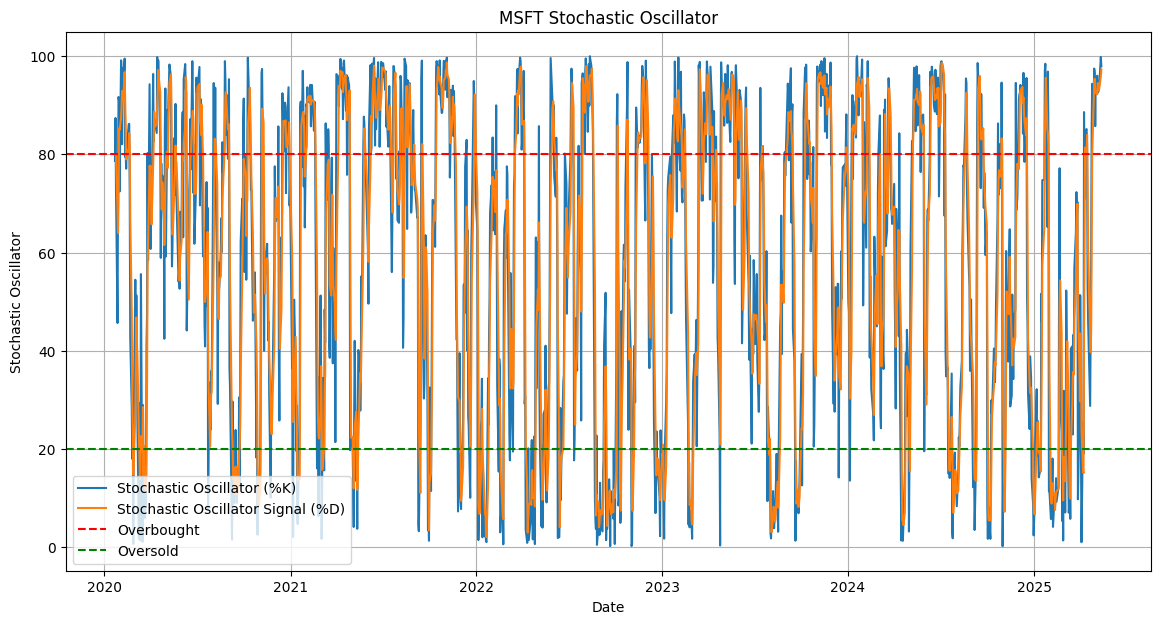

In [6]:
#Stochastic Oscillator
data['SO'] = ta.momentum.stoch(data['High'], data['Low'], data['Close'], window=14, smooth_window=3)
data['SO_D'] = ta.momentum.stoch_signal(data['High'], data['Low'], data['Close'], window=14, smooth_window=3)
plt.figure(figsize=(14, 7))
plt.plot(data['SO'], label='Stochastic Oscillator (%K)')
plt.plot(data['SO_D'], label='Stochastic Oscillator Signal (%D)')
plt.axhline(80, color='red', linestyle='--', label='Overbought')
plt.axhline(20, color='green', linestyle='--', label='Oversold')
plt.title(f'{ticker} Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Stochastic Oscillator')
plt.legend()
plt.grid()
plt.show()